<a href="https://colab.research.google.com/github/mpatel5/FoundationsOfDataScience/blob/main/PythonProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
try:
    df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

In [16]:
df.head()

,school dbn,school name,school level,regents exam,year,total tested,mean score,number scoring below 65,percent scoring below 65,number scoring 65 or above,percent scoring 65 or above,number scoring 80 or above,percent scoring 80 or above,number scoring cr,percent scoring cr
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,s,s,s,s,s,s,na,na


In [17]:
df.describe()

,year,total tested,mean score
count,212331.000000,212331.000000,137109.000000
mean,2015.956069,49.364200,65.998967
std,0.799726,93.023576,11.288883
min,2015.000000,1.000000,15.000000
25%,2015.000000,5.000000,58.300000
50%,2016.000000,20.000000,65.400000
75%,2017.000000,57.000000,73.400000
max,2017.000000,1729.000000,98.700000


In [3]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower()

In [4]:
# Explore dataset
print("Column Names:", df.columns.tolist())  # Check column names
print(df.head())  # Sample data

Column Names: ['school dbn', 'school name', 'school level', 'regents exam', 'year', 'total tested', 'mean score', 'number scoring below 65', 'percent scoring below 65', 'number scoring 65 or above', 'percent scoring 65 or above', 'number scoring 80 or above', 'percent scoring 80 or above', 'number scoring cr', 'percent scoring cr']
  school dbn                     school name school level  \
0     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
1     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
2     01M034  P.S. 034 Franklin D. Roosevelt          K-8   
3     01M140          P.S. 140 Nathan Straus          K-8   
4     01M140          P.S. 140 Nathan Straus          K-8   

          regents exam  year  total tested mean score number scoring below 65  \
0  Common Core Algebra  2017             4          s                       s   
1   Living Environment  2015            16       77.9                       1   
2   Living Environment  2016             9         74   

In [5]:
# Define school and metric
school_name = "BROOKLYN TECHNICAL HIGH SCHOOL"
metric = "Mean Score".lower()  # Ensure matching case

In [6]:
# Verify column existence
if metric not in df.columns:
    raise ValueError(f"Column '{metric}' not found. Available columns: {df.columns.tolist()}")

In [7]:
# Convert 'Mean Score' to numeric
df[metric] = pd.to_numeric(df[metric], errors='coerce')

In [10]:
# Check if 'School Name' exists
school_name_col = "school name".lower()
if school_name_col not in df.columns:
    raise ValueError(f"Column '{school_name_col}' not found.")

In [9]:
# Filter data for selected school
school_data = df[df[school_name_col] == school_name].copy()

In [11]:
# Identify borough-based filtering column (if available)
if "school dbn" in df.columns:
    brooklyn_schools = df[df["school dbn"].astype(str).str.startswith("K")].copy()
else:
    raise ValueError("'School DBN' column not found. Adjust filtering criteria.")

In [12]:
# Calculate average scores
brooklyn_avg = brooklyn_schools[metric].mean()
school_avg = school_data[metric].mean()

print(f"{school_name} {metric}: {school_avg:.2f}")
print(f"Brooklyn Schools {metric}: {brooklyn_avg:.2f}")

BROOKLYN TECHNICAL HIGH SCHOOL mean score: nan
Brooklyn Schools mean score: nan


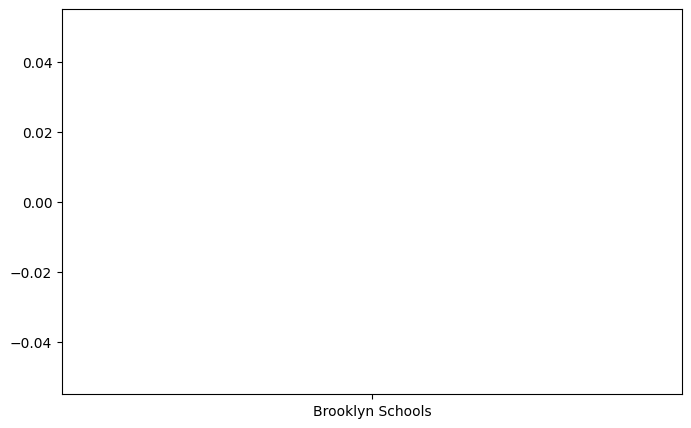

In [13]:
# Visualization
categories = ["Brooklyn Schools", school_name]
values = [brooklyn_avg, school_avg]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['blue', 'orange'])

No valid data to plot.


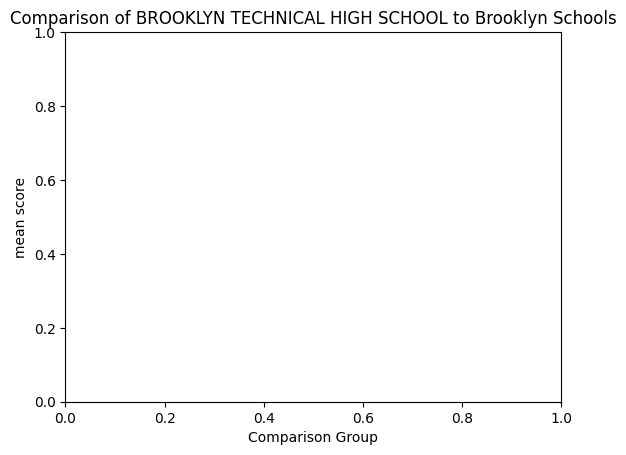

In [14]:
# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Comparison Group")
plt.ylabel(metric)
plt.title(f"Comparison of {school_name} to Brooklyn Schools")

if not pd.isna(brooklyn_avg) and not pd.isna(school_avg):
    plt.ylim(min(values) - 5, max(values) + 5)
else:
    print("No valid data to plot.")

plt.show()

In [15]:
# Conclusion
comparison = "higher" if school_avg > brooklyn_avg else "lower"
print(f"Conclusion: The average Regents exam score for {school_name} was {school_avg:.2f}, which is {comparison} than the average score for all Brooklyn schools ({brooklyn_avg:.2f}).")

Conclusion: The average Regents exam score for BROOKLYN TECHNICAL HIGH SCHOOL was nan, which is lower than the average score for all Brooklyn schools (nan).
